# 1. Importing Dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
file_path = '/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv'

dataframe = pd.read_csv(file_path)

# 2. Describing Dataset

In [3]:
dataframe.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
dataframe.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


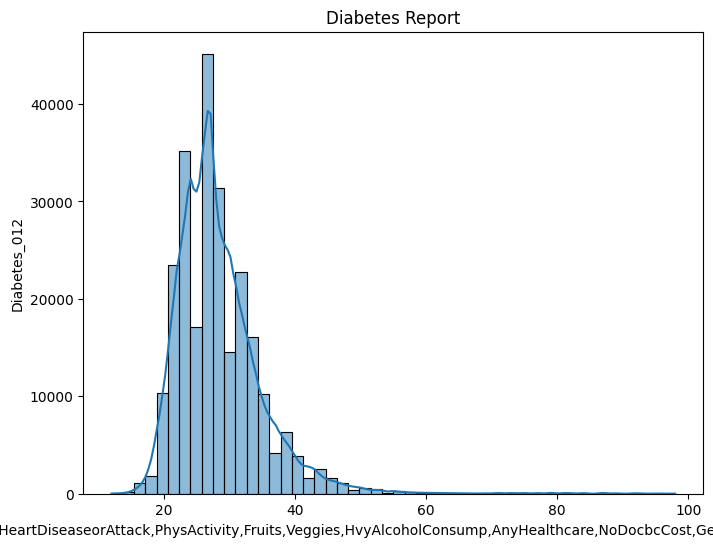

In [6]:
plt.figure(figsize=(8,6))
sns.histplot(dataframe['BMI'],bins=50,kde=True)
plt.title('Diabetes Report')
plt.xlabel("Age,HighBP,HighChol,CholCHeck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Education,Income")
plt.ylabel("Diabetes_012")
plt.show()

In [7]:
dataframe.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

conversion of float to int


# 3. Data Preprocessing

In [9]:
float_columns = dataframe.select_dtypes(include=['float']).columns
dataframe[float_columns] = dataframe[float_columns].astype(int) 


In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [11]:
print(dataframe['Diabetes_012'].value_counts())

Diabetes_012
0    213703
2     35346
1      4631
Name: count, dtype: int64


In [12]:
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 69.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.22.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.10.0, but you have google-cloud-bigquery 2.34.4 which is incompatible.
bigframes 0.22.0 requires google-cloud-storage>=2.0.0, but you have google-cloud-storage 1.44.0 which is incompatible.
bigframes 0.22.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.3 which is incompatible.
cesium 0.12.3 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
dataproc-jupyter-plugin 0.1.79 requires pydantic~=1.10.0, but you have pydantic 2.10.2 which is incompatible.


# 4. Defining X (Categorical Features) and y (labels)

In [13]:
X = dataframe.drop(['Diabetes_012','Education','Income'], axis=1)   
y = dataframe['Diabetes_012']

In [14]:
y = dataframe['Diabetes_012'].astype(int)

# 5. Model Training (Random Forest Classifier)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [17]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200)

In [18]:
classifier.fit(X=X_train,y=y_train)

RandomForestClassifier(n_estimators=200)

# 6. Prediciton and Metrics

In [19]:
test_pred = classifier.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [21]:
accuracy = accuracy_score(y_test,test_pred)

In [22]:
print('Accuracy score is '+ str((accuracy * 100 )) )

Accuracy score is 83.78271838536739


In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [24]:
cm = confusion_matrix(y_test, test_pred)

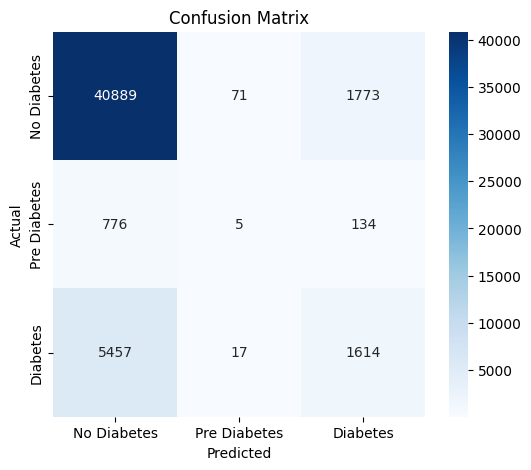

In [25]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Pre Diabetes','Diabetes'], yticklabels=['No Diabetes', 'Pre Diabetes','Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[40889    71  1773]
 [  776     5   134]
 [ 5457    17  1614]]


In [27]:
from sklearn.ensemble import RandomForestClassifier

# Assuming this is your trained model
model = RandomForestClassifier()
model.fit(X_train, y_train)  # Replace with your training data


RandomForestClassifier()

In [28]:
import joblib

# Save the model after training (if not done already)
joblib.dump(model, 'random_forest_model.pkl')

# Load the model for prediction
model = joblib.load('random_forest_model.pkl')


In [29]:
joblib.dump(model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [30]:
import numpy as np
import pandas as pd
import joblib

# Load the trained Random Forest model
model = joblib.load('random_forest_model.pkl')  # Ensure this file exists in your working directory

# Example input values (replace with your actual values)
input_data = np.array([[1, 1, 1, 35, 1, 1, 1, 0, 0, 0, 0, 1, 1, 5, 8, 10, 1, 0, 60]])

# Define column names based on your dataset
columns = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 
           'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
           'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 
           'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age']

# Convert the input array into a DataFrame
input_df = pd.DataFrame(input_data, columns=columns)

# Predict the class
prediction = model.predict(input_df)

# Print the result
if prediction[0] == 0:
    print("Prediction: No Diabetes")
elif prediction[0] == 1:
    print("Prediction: Pre-Diabetes")
else:
    print("Prediction: Diabetes")

# Optional: Predict probabilities for each class
probabilities = model.predict_proba(input_df)
print("Class Probabilities:", probabilities)

Prediction: Diabetes
Class Probabilities: [[0.34 0.04 0.62]]


In [31]:
train_accuracy = classifier.score(X_train, y_train)
test_accuracy = classifier.score(X_test, y_test)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')


Training Accuracy: 0.97
Test Accuracy: 0.84


In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202944 entries, 226555 to 161176
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                202944 non-null  int64
 1   HighChol              202944 non-null  int64
 2   CholCheck             202944 non-null  int64
 3   BMI                   202944 non-null  int64
 4   Smoker                202944 non-null  int64
 5   Stroke                202944 non-null  int64
 6   HeartDiseaseorAttack  202944 non-null  int64
 7   PhysActivity          202944 non-null  int64
 8   Fruits                202944 non-null  int64
 9   Veggies               202944 non-null  int64
 10  HvyAlcoholConsump     202944 non-null  int64
 11  AnyHealthcare         202944 non-null  int64
 12  NoDocbcCost           202944 non-null  int64
 13  GenHlth               202944 non-null  int64
 14  MentHlth              202944 non-null  int64
 15  PhysHlth              202944 non-n

f1 score


In [33]:
from sklearn.metrics import f1_score

# Calculate F1 score
f1 = f1_score(y_test, test_pred, average='weighted')

print('F1 Score is: ', f1)


F1 Score is:  0.8092381119518374


#heatmap

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


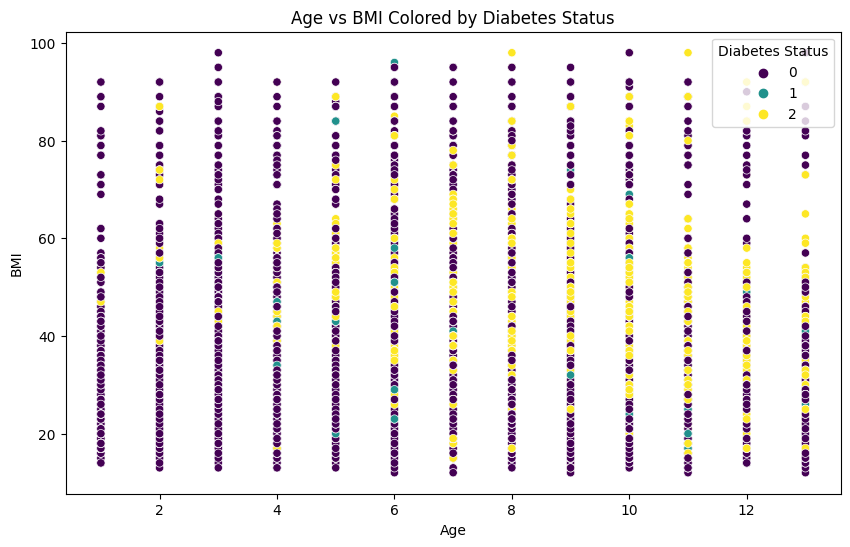

In [34]:
# Scatterplot of Age vs BMI colored by Diabetes Status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='BMI', hue='Diabetes_012', data=dataframe, palette='viridis')
plt.title('Age vs BMI Colored by Diabetes Status')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Diabetes Status')
plt.show()


In [35]:
res = pd.DataFrame({'actual value':y_test,'predicted value':test_pred})

In [36]:
res

,actual value,predicted value
162365,0,0
202491,0,0
12510,0,0
33283,0,0
211495,0,0
...,...,...
186176,2,0
191012,2,2
209999,0,0
56042,0,0


#preformmance metrics

In [37]:
from sklearn.metrics import classification_report

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, test_pred, target_names=['No Diabetes', 'Pre Diabetes', 'Diabetes']))


Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.87      0.96      0.91     42733
Pre Diabetes       0.05      0.01      0.01       915
    Diabetes       0.46      0.23      0.30      7088

    accuracy                           0.84     50736
   macro avg       0.46      0.40      0.41     50736
weighted avg       0.80      0.84      0.81     50736



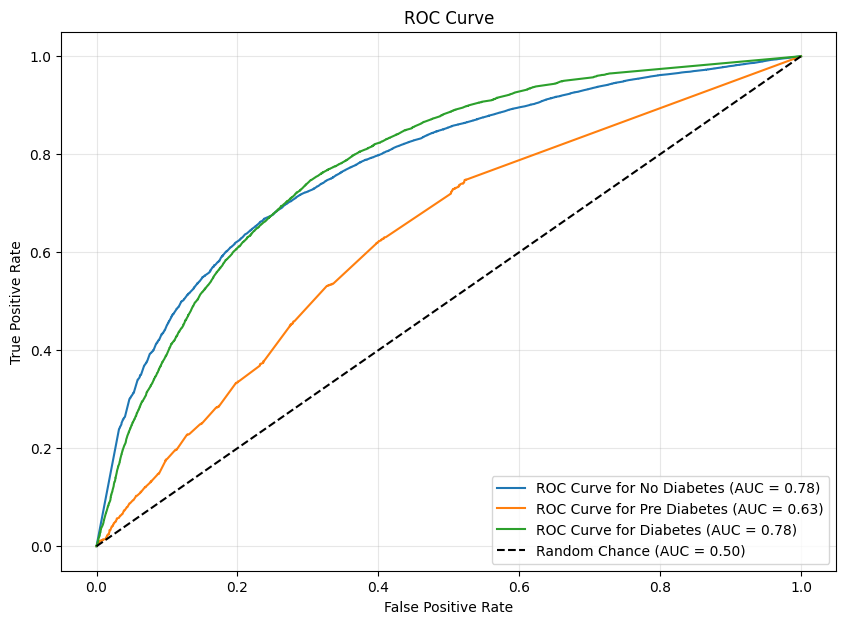

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels for multi-class ROC curve
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
test_pred_prob = classifier.predict_proba(X_test)

# Plot the ROC curve for each class
plt.figure(figsize=(10, 7))
for i, label in enumerate(['No Diabetes', 'Pre Diabetes', 'Diabetes']):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], test_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f"ROC Curve for {label} (AUC = {roc_auc_score(y_test_binarized[:, i], test_pred_prob[:, i]):.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Chance (AUC = 0.50)")
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


#class distribution graph


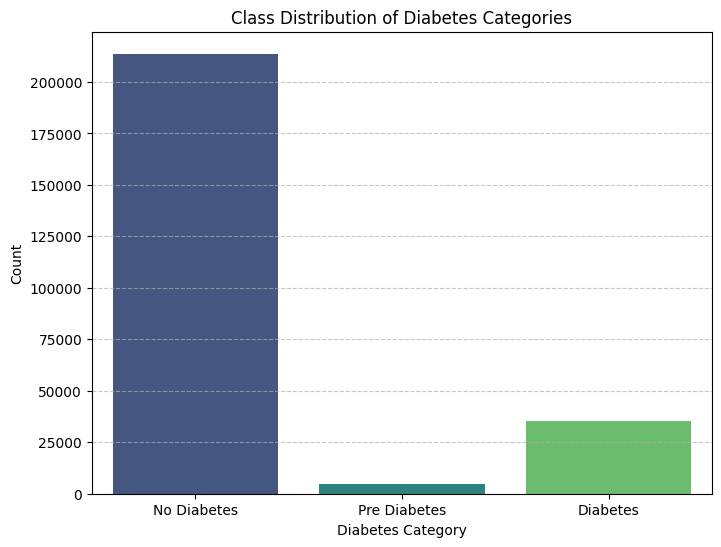

In [39]:
# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=dataframe['Diabetes_012'], palette="viridis")
plt.title('Class Distribution of Diabetes Categories')
plt.xlabel('Diabetes Category')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['No Diabetes', 'Pre Diabetes', 'Diabetes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train KNN model
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn_classifier.fit(X_train, y_train)

# Make predictions
knn_test_pred = knn_classifier.predict(X_test)

# Evaluate KNN model
knn_accuracy = accuracy_score(y_test, knn_test_pred)
print(f'KNN Accuracy score is {knn_accuracy * 100:.2f}')

KNN Accuracy score is 83.13


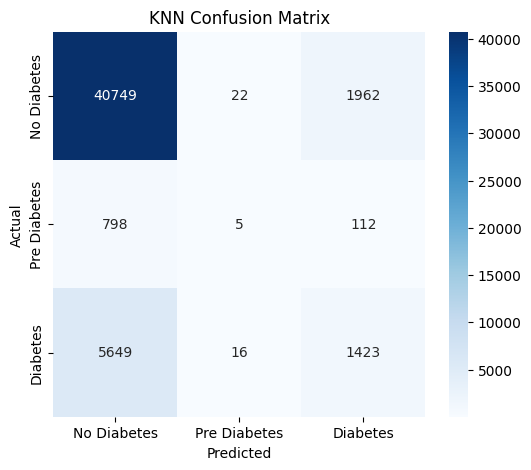

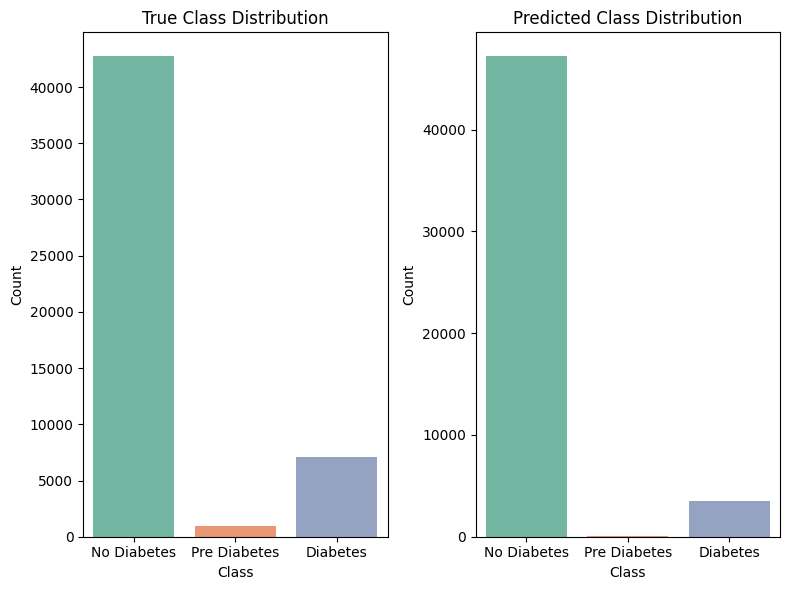

In [41]:
# Confusion matrix for KNN
knn_cm = confusion_matrix(y_test, knn_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Pre Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Pre Diabetes', 'Diabetes'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=y_test, palette='Set2')
plt.title('True Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['No Diabetes', 'Pre Diabetes', 'Diabetes'])

plt.subplot(1, 2, 2)
sns.countplot(x=knn_test_pred, palette='Set2')
plt.title('Predicted Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['No Diabetes', 'Pre Diabetes', 'Diabetes'])

plt.tight_layout()
plt.show()


In [42]:
knn_f1 = f1_score(y_test, knn_test_pred, average='weighted')
print('KNN F1 Score is: ', knn_f1)

# Classification report for KNN
print("KNN Classification Report:")
print(classification_report(y_test, knn_test_pred, target_names=['No Diabetes', 'Pre Diabetes', 'Diabetes']))

# Save the KNN model
import joblib
joblib.dump(knn_classifier, 'knn_model.pkl')
print("KNN Model saved as knn_model.pkl")

KNN F1 Score is:  0.8010488826433414
KNN Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.86      0.95      0.91     42733
Pre Diabetes       0.12      0.01      0.01       915
    Diabetes       0.41      0.20      0.27      7088

    accuracy                           0.83     50736
   macro avg       0.46      0.39      0.40     50736
weighted avg       0.79      0.83      0.80     50736

KNN Model saved as knn_model.pkl


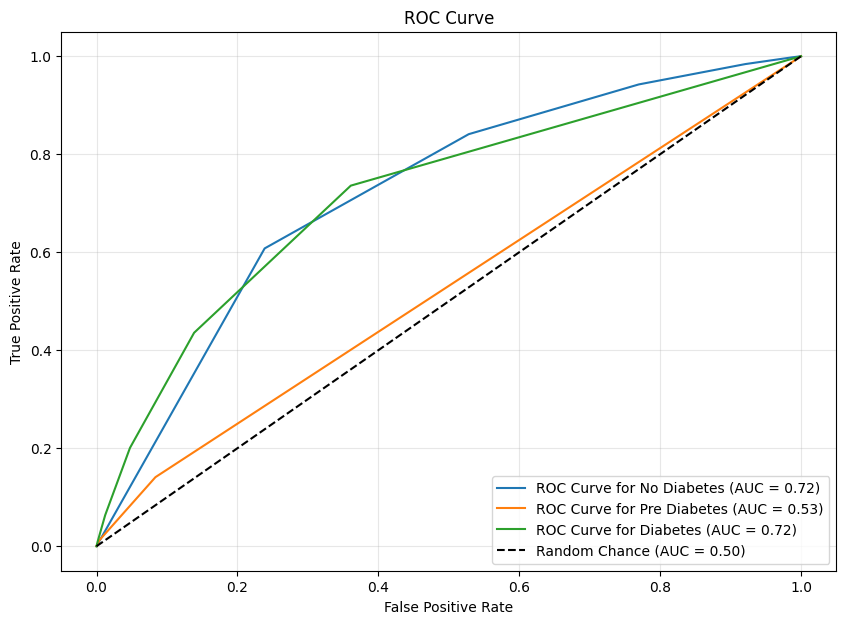

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels for multi-class ROC curve
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
test_pred_prob = knn_classifier.predict_proba(X_test)

# Plot the ROC curve for each class
plt.figure(figsize=(10, 7))
for i, label in enumerate(['No Diabetes', 'Pre Diabetes', 'Diabetes']):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], test_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f"ROC Curve for {label} (AUC = {roc_auc_score(y_test_binarized[:, i], test_pred_prob[:, i]):.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Chance (AUC = 0.50)")
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()